# 03.02 - SUPERVISED ALGORITHMS

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [1]:
from sklearn.datasets import *
import numpy as np
from local.lib import mlutils
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## SUPERVISED ALGORITHMS

- We are given $X$ and $y$


In [2]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1)
X.shape, y.shape

((400, 2), (400,))

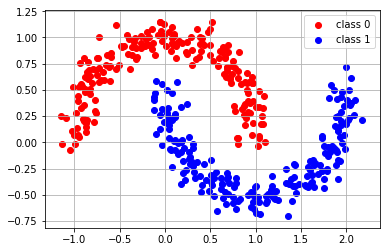

In [3]:
## KEEPOUTPUT
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

In [4]:
X[:10]

array([[-0.82512551,  0.51226287],
       [ 0.60379822,  0.87094443],
       [ 1.02259215, -0.52023705],
       [ 1.02078996, -0.03804877],
       [ 0.97289093,  0.1828423 ],
       [ 0.89937567,  0.49863931],
       [ 1.59814419, -0.26501538],
       [ 0.19727319, -0.29126675],
       [ 0.64073193, -0.53018568],
       [ 1.63991665, -0.4218243 ]])

In [5]:
y[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

## Clasificador Lineal

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
lr.score(X,y)

/opt/anaconda2/envs/p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.88

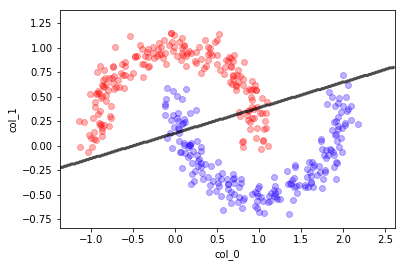

In [9]:
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(lr.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col_0"); plt.ylabel("col_1");

## Arboles de decision

In [6]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)
y_preds = dt.predict(X)
dt.score(X,y)

0.9225

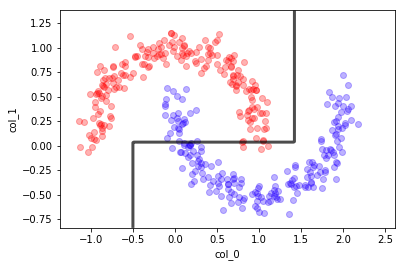

In [7]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=3); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col_0"); plt.ylabel("col_1");

- **samples**: nb of data points in the split
- **value**: nb samples of each class in the split
- **class**: class assigned to the split (the majority class in **value**)

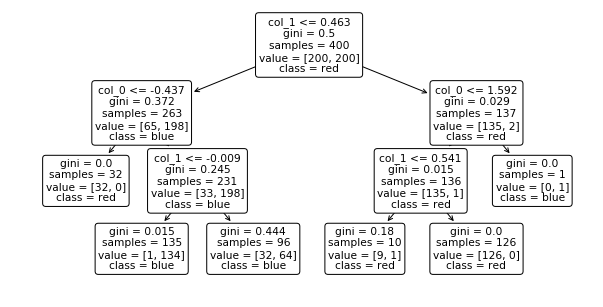

In [84]:
## KEEPOUTPUT
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

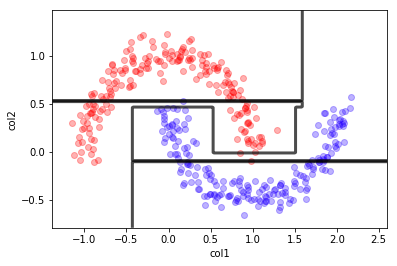

In [85]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=10); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

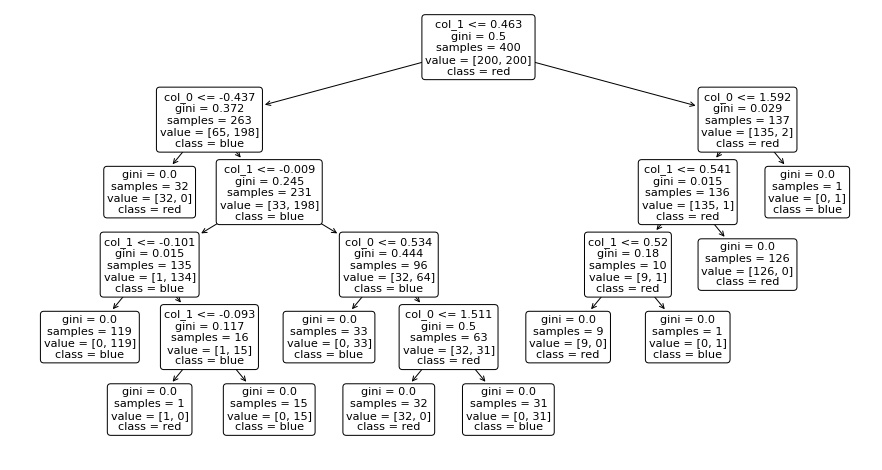

In [86]:
## KEEPOUTPUT
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

In [87]:
X,y = make_circles(400, noise=0.05)

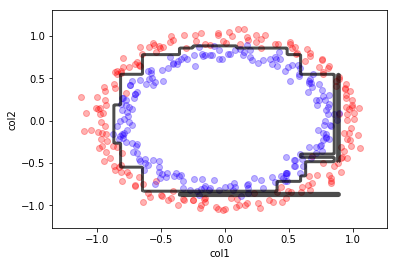

In [88]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=10); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

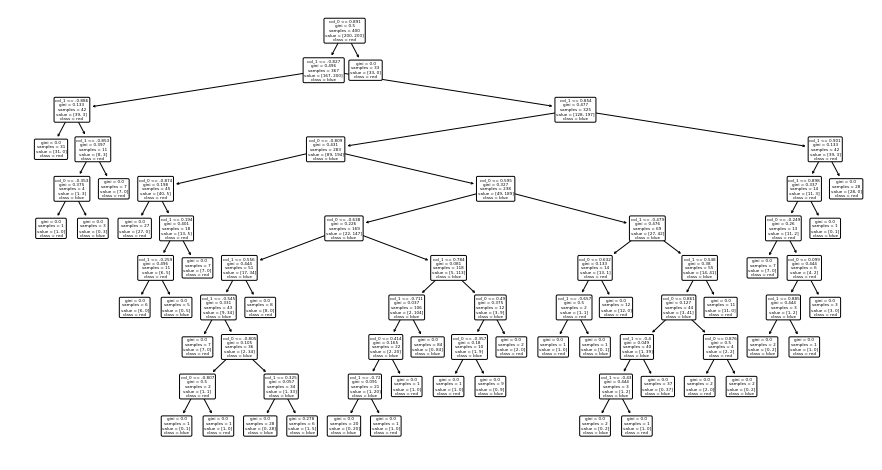

In [89]:
## KEEPOUTPUT
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

## Random forests

0.995 0.995


(0.618075, 0.381925)

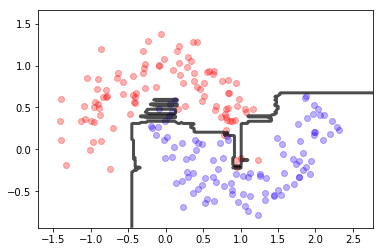

In [103]:
## KEEPOUTPUT
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=10)
rf.fit(X,y)
print (rf.score(X,y),rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


1.0


(0.500675, 0.499325)

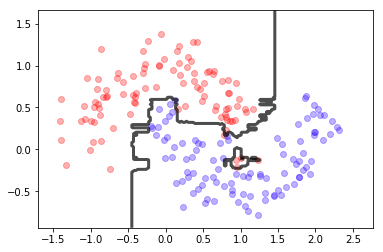

In [104]:
## KEEPOUTPUT
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(X,y)
print (rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


## Naive Bayes

(0.53705, 0.46295)

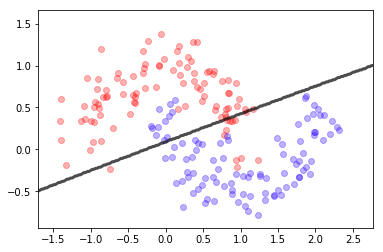

In [105]:
## KEEPOUTPUT
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.68615, 0.31385)

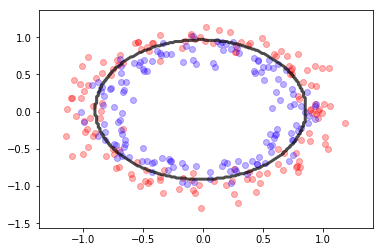

In [106]:
## KEEPOUTPUT
X,y = make_circles(300, noise=.1)
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.517975, 0.482025)

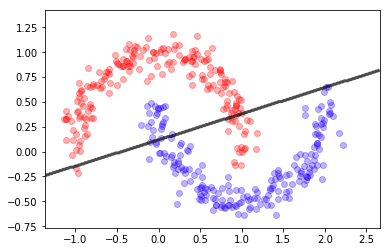

In [107]:
## KEEPOUTPUT
X,y = make_blobs(300, centers=2, cluster_std=2)
X, y = make_moons(400, noise=0.1)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


observa que si alguna de las variables no es independiente el método falla

/opt/anaconda3/envs/p36cpu/lib/python3.6/site-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


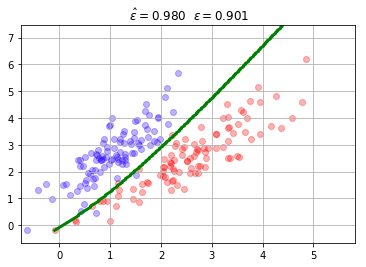

In [96]:
## KEEPOUTPUT
mc = mlutils.Example_Bayes2DClassifier(mean0=[2.5, 2.5], cov0=[[.9, .9], 
                                                               [0.8, 1.1]],
                                        mean1=[1, 2.5], cov1=[[0.5,.8],
                                                             [0.4,0.9]])
X,y = mc.sample(200)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();


0.85


(0.66155, 0.33845)

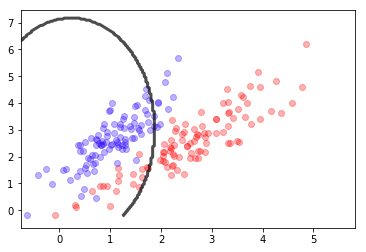

In [97]:
## KEEPOUTPUT
gb.fit(X,y)
print (gb.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
